# 1. Рассмотрим таблицы AsiaArgento и JimmyBennet

In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Считываем данные в dataframe
Asia = pd.read_csv('AsiaArgento.csv')
# Просматриваем начало данных
Asia.head()

C:\Users\Alla\Anaconda3\lib\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,author_id,author_name,created_at,favorite_count,id_str,is_verified_user,lang,retweet_count,text
0,934267631766454272,Scotty Truth,Thu Aug 23 23:59:58 +0000 2018,0.0,1.032780e+18,False,en,2.0,RT @winters_wolfe: Monster Hunters takes a close look at Asia Argento!!!\r\n\r\nhttps://t.co/y7a6gFbc7P
1,3403823231,Françoise Niel Aubin,Thu Aug 23 23:59:54 +0000 2018,0.0,1.032779e+18,False,en,0.0,"@Francoisefersen, https://t.co/DHJwiCpxlT Argento : l'accusateur Jimmy Bennett s'exprime https://t.co/fItqcf23MV via @Culturebox"
2,315436072,A highly coveted Vinnie Tesla,Thu Aug 23 23:59:51 +0000 2018,0.0,1.032779e+18,False,en,14.0,"RT @RonHogan: It takes some mental gymnastics to make Asia Argento the centerpiece of your anti-Semitic worldview, but this Department of T…"
3,727472528,Instapundit.com,Thu Aug 23 23:59:46 +0000 2018,0.0,1.032779e+18,False,en,33.0,RT @TMZ: Asia Argento and 17-Year-Old Boy in Bed in Sexual Encounter https://t.co/6Rw4i2nfHF
4,30067563,Rich,Thu Aug 23 23:59:41 +0000 2018,0.0,1.032779e+18,False,en,227.0,RT @CNN: A photo appearing to show actress and #MeToo movement leader Asia Argento lying down with young actor Jimmy Bennett has surfaced h…


In [422]:
import numpy as np
import seaborn as sns

In [423]:
# так как таблица читается с предупреждениями о смешанных типах, возможно, нужно ее каким-то образом нормализовать 
# используем регулярные выражения
import re

pattern = r'([0-9]+),([^,]+|\".*\"),(\w{3} \w{3} \d{2} \d{2}:\d{2}:\d{2} \+\d{4} \d{4}),(\d+),(\d+),(False|True),(\w{2}),(\d+),(.+\n|\".\,*\"\n)'

with open('AsiaArgento.csv', encoding='utf-8') as f:
    with open('AsiaArgento-normalized.csv', 'w+', encoding='utf-8') as w:
        w.write('author_id,author_name,created_at,favorite_count,id_str,is_verified_user,lang,retweet_count,text\n')
        for match in re.finditer(pattern, f.read(), flags=re.UNICODE):
            #w.write(match.group(0))
            author_id = match.group(1)
            author_name = match.group(2).replace(',', '')
            created_at = match.group(3)
            favorite_count = match.group(4)
            id_str = match.group(5)
            is_verified_user = match.group(6)
            lang = match.group(7)
            retweet_count = match.group(8)
            text = match.group(9).replace('\n', '').replace('\r', '').replace(',', '')
            if text.startswith('"') and text.endswith('"'):
                text = text.replace('"', '')

            w.write('{},"{}",{},{},{},{},{},{},"{}"\n'.format(author_id, author_name, created_at, favorite_count,
                                                              id_str, is_verified_user, lang, retweet_count, text))

In [424]:
# Считываем данные заново
Asia = pd.read_csv('AsiaArgento-normalized.csv')
# Преобразуем столбец с датой в формат datetime
Asia.created_at = pd.to_datetime(Asia.created_at)
# Добавим колонку  "ретвит или нет (False/True)"
Asia['is_RT'] = Asia['text'].str.startswith('RT')
# Просматриваем начало данныx
Asia.head()

,author_id,author_name,created_at,favorite_count,id_str,is_verified_user,lang,retweet_count,text,is_RT
0,934267631766454272,Scotty Truth,2018-08-23 23:59:58,0,1032779511413145600,False,en,2,"RT @winters_wolfe: Monster Hunters takes a close look at Asia Argento!!!""",True
1,3403823231,Françoise Niel Aubin,2018-08-23 23:59:54,0,1032779494170550273,False,en,0,@Francoisefersen https://t.co/DHJwiCpxlT Argento : l'accusateur Jimmy Bennett s'exprime https://t.co/fItqcf23MV via @Culturebox,False
2,315436072,A highly coveted Vinnie Tesla,2018-08-23 23:59:51,0,1032779482187411457,False,en,14,RT @RonHogan: It takes some mental gymnastics to make Asia Argento the centerpiece of your anti-Semitic worldview but this Department of T…,True
3,727472528,Instapundit.com,2018-08-23 23:59:46,0,1032779463023570945,False,en,33,RT @TMZ: Asia Argento and 17-Year-Old Boy in Bed in Sexual Encounter https://t.co/6Rw4i2nfHF,True
4,30067563,Rich,2018-08-23 23:59:41,0,1032779439606718464,False,en,227,RT @CNN: A photo appearing to show actress and #MeToo movement leader Asia Argento lying down with young actor Jimmy Bennett has surfaced h…,True


In [425]:
# считаем данные из второй таблицы
Jimmy = pd.read_csv('JimmyBennet.csv')
Jimmy.created_at = pd.to_datetime(Jimmy.created_at)
# Просматриваем начало данных, убеждаемся, что считалось корректно
Jimmy.head()

,author_id,author_name,created_at,favorite_count,id_str,is_verified_user,lang,retweet_count,text,is_RT
0,101745089,Trevor Belmont,2018-08-22 23:59:46,0,1032417076051423232,False,en,6314,"RT @nytimes: Breaking News: Asia Argento, a leading voice of #MeToo, arranged to pay an actor after he claimed she sexually assaulted him w…",True
1,745398650013028352,Sandra Kitchen,2018-08-22 23:59:41,2,1032417053800652800,False,en,1,The gender involved in an inappropriate and upsetting encounter should not be a factor in generating validation. Th… https://t.co/3HmkBiCbr7,False
2,13000572,Laura Krabappel,2018-08-22 23:59:22,0,1032416975383920640,False,en,388,"RT @ira: I'm glad to finally hear from the victim in all of this, because frankly the entire conversation around this has been gross\r\nhttps:…",True
3,160652043,Zia Paul,2018-08-22 23:59:18,0,1032416956316569602,False,en,388,"RT @ira: I'm glad to finally hear from the victim in all of this, because frankly the entire conversation around this has been gross\r\nhttps:…",True
4,3102644802,Gary Johnston 🇺🇸,2018-08-22 23:59:10,0,1032416924716683264,False,en,0,Jimmy Bennett Breaks His Silence on Asia Argento Sexual Assault Claims https://t.co/llJG8kexOp,False


# 2. Посмотрим самые первые твиты с упоминанием этих двух персонажей, с чего начались обсуждения

In [426]:
sorted_by_date = Asia.sort_values('created_at', ascending = True)
sorted_by_date.head(n=100)

,author_id,author_name,created_at,favorite_count,id_str,is_verified_user,lang,retweet_count,text,is_RT
125605,714935037716725761,Mark H.,2018-08-18 00:21:39,1,1030610642783428608,False,en,0,@SlopeOfHope She’s a witch. Like Asia Argento Anthony Bourdains girlfriend. We all know what happened to him.,False
125604,1579583863,Rias,2018-08-18 01:03:46,0,1030621239222497281,False,en,0,When Issei goes to the abandoned church to rescue Asia Argento Rias helps Issei indirectly by killing three of Ray… https://t.co/7BTOQ7fC6k,False
125603,3295084221,Наталия Иванова,2018-08-18 01:14:36,0,1030623969207087104,False,en,0,"Asia Argento in B Monkey (1998)""",False
125602,14111708,Rejected Paimon Vessel,2018-08-18 01:35:11,2,1030629147067011072,False,en,0,@bigangrylaw She's not the champion she got taken out in the #MeToo quarterfinals by Asia Argento,False
125601,14338378,Amelia Mangan,2018-08-18 01:58:11,2,1030634935755796485,False,en,0,@cybersphynx The truest MVP is Asia Argento as Madame du Barry. She's absolutely delightful.,False
125600,46140973,ZAS,2018-08-18 03:16:06,0,1030654543112142848,False,en,0,@_skiptracer21 My gf sent me this and now I’m a believer https://t.co/CQxQeACIey,False
125599,113182451,Stephanie Ng,2018-08-18 05:48:32,0,1030692904468004865,False,en,1,RT @GenoWithAnE: Here an individual that was formerly hired by Weinstein highlighted by the NY Times article cited in this thread attemp…,True
125598,794635502418849796,MARTINEZ VANESSA,2018-08-18 09:05:11,0,1030742392595472384,False,en,0,And why asia argento rose mcgowan who are satanists women and impostors about rights of women show themselves with… https://t.co/OpBBmDh9G8,False
125597,2974438360,SignorWardh,2018-08-18 10:31:08,79,1030764023732678663,False,en,14,The many faces of Asia Argento in The Stendhal Syndrome (Dario Argento 1996) https://t.co/QKTE8DJzYH,False
125596,219082089,Dr Colette Balmain,2018-08-18 10:59:58,1,1030771279899635712,False,en,0,@darklonelywater Yes. I have come to realise that translation is so complex. Languages don’t fit neatly with each o… https://t.co/6zsOqzPaG8,False


In [427]:
#самый первый твит за период про Asia Argento
pd.options.display.max_colwidth=250
#pd.options.display.width=400
sorted_by_date[['author_name','created_at','text']][:1]
#sorted_by_date['text'][:1].to_string(length = True, dtype = str)


,author_name,created_at,text
125605,Mark H.,2018-08-18 00:21:39,@SlopeOfHope She’s a witch. Like Asia Argento Anthony Bourdains girlfriend. We all know what happened to him.


In [428]:
sorted_by_date_Jimmy = Jimmy.sort_values('created_at', ascending = True)
#sorted_by_date_Jimmy.head(n=100)
#самый первый твит за период про Jimmy Bennet
sorted_by_date_Jimmy[['author_name','created_at','text']][:1]

,author_name,created_at,text
31338,John Premo,2018-08-18 01:47:10,RT @DustinBumgarner: @taylor_radtke @SconnieSports Let's not pretend that Martellus Bennett has ever been anywhere near Jimmy Graham's leve…


In [429]:
sorted_by_date_Jimmy['text'][:1]

31338    RT @DustinBumgarner: @taylor_radtke @SconnieSports Let's not pretend that Martellus Bennett has ever been anywhere near Jimmy Graham's leve…
Name: text, dtype: object

# 3.1 Посмотрим самый популярный твит по числу лайков

In [430]:
#Самый популярный твит- с наибольшим числом лайков ("favorite count")
Asia_likes= Asia.groupby(['text','author_name'])['favorite_count'].agg('sum').reset_index(name='sum').sort_values('sum',ascending = False)
Asia_likes.head()

,text,author_name,sum
16249,Breaking News: Asia Argento a leading voice of #MeToo arranged to pay an actor after he claimed she sexually assa… https://t.co/QKV5FZDVih,The New York Times,7820
33,"""The woman"""" = nameless Black woman """,SmoQUEEN,7695
7100,"As we learn about Asia Argento being accused of rape there are a few things to bear in mind:""",joanna schroeder,6350
18767,I got to know Asia Argento ten months ago. Our commonality is the shared pain of being assaulted by Harvey Weinstei… https://t.co/vlLf4UTdxz,rose mcgowan,5688
18563,"I always said Weinstein was ofered up as a scape goat to hide the real issue.""",Mike Cernovich 🇺🇸,5418


In [431]:
Jimmy_likes= Jimmy.groupby(['text','author_name'])['favorite_count'].agg('sum').reset_index(name='sum').sort_values('sum',ascending = False)
Jimmy_likes.head()

,text,author_name,sum
3616,"Breaking News: Asia Argento, a leading voice of #MeToo, arranged to pay an actor after he claimed she sexually assa… https://t.co/QKV5FZDVih",The New York Times,7826
29856,"This is awful, but I don't see any conclusion to draw from it besides ""Two things can be true at once."" https://t.co/4mi3zQPUmv",Mark Harris,4673
30671,re; Asia Argento: \r\n\r\n1. I believe she assaulted Jimmy Bennett. \r\n\r\n2. I also believe that Harvey Weinstein assaulted h… https://t.co/GtnuRfRi6M,☪️ Sha Naqba Īmuru ✡️,4218
2362,"Asia Argento wrote &amp; directed a movie where she was a prostitute, 7-year old Jimmy Bennett played her son, whom her… https://t.co/NK7Jx8QMDp",John Durant,2499
29865,This is how young Jimmy Bennett was when Asia Argento worked with him. She knew him as a child and stands accused p… https://t.co/i2WR5nul5s,Robby Starbuck,1910


# 3.2 Самый цитируемый твит - максимальное число ретвитов

In [432]:
# Ищем максимальное значение числа ретвитов
max_retwit_Asia = Asia.retweet_count.max() # 6317
#print(max_retwit_Asia)

In [433]:
#найдем самый цитируемый твит по числу ретвитов и с False в колонке is_retweet
max_retweet_data_Asia = Asia[['id_str','author_name','created_at','retweet_count','text']][(Asia.retweet_count == max_retwit_Asia) & (Asia.is_RT == False)]
max_retweet_data_Asia

,id_str,author_name,created_at,retweet_count,text
125555,1031351958072963077,The New York Times,2018-08-20 01:27:23,6317,Breaking News: Asia Argento a leading voice of #MeToo arranged to pay an actor after he claimed she sexually assa… https://t.co/QKV5FZDVih


In [434]:
max_retwit_Jimmy = Jimmy.retweet_count.max()

In [435]:
max_retweet_data_Jimmy = Jimmy[['id_str','author_name','created_at','retweet_count','text']][(Jimmy.retweet_count == max_retwit_Jimmy) & (Jimmy.is_RT == False)]
max_retweet_data_Jimmy

,id_str,author_name,created_at,retweet_count,text
31319,1031351958072963077,The New York Times,2018-08-20 01:27:23,6314,"Breaking News: Asia Argento, a leading voice of #MeToo, arranged to pay an actor after he claimed she sexually assa… https://t.co/QKV5FZDVih"


# 4. Посмотрим топ 10 самых активных авторов из обеих таблиц

# 4.1 Самые активно пишущие

In [436]:
# выберем 10 авторов с наибольшим количеством написанных твитов
Asia_authors= Asia.groupby(['author_name','is_RT'])['id_str'].agg('count').reset_index(name='count')
Asia_authors = Asia_authors[['author_name','count']][Asia_authors.is_RT == False].sort_values('count',ascending = False)
Asia_authors.head(10) 

,author_name,count
41887,Pronounceable Name,136
27934,Kamrunnahar Shonayna,99
51740,The_News_DIVA🎀,62
65916,ω๏๏∂y,46
20282,Gospel Trump 😛☣🇺🇸🕎📖,44
21823,Hollywood Reporter,42
37318,MyAllies News,42
52707,Top News Today,37
19892,Gina Lawriw,34
41614,Popular Crime,33


In [437]:
Jimmy_authors= Jimmy.groupby(['author_name','is_RT'])['id_str'].agg('count').reset_index(name='count')
Jimmy_authors = Jimmy_authors[['author_name','count']][Jimmy_authors.is_RT == False].sort_values('count',ascending = False)
Jimmy_authors.head(10)

,author_name,count
5216,Duong,41
22188,♥B♥B♥ ♓ #29K,16
17236,The Independent,16
10436,Liam Foden,14
21965,вяєт fυςкιтσℓ,13
16171,Slate,12
21943,ω๏๏∂y,11
17176,The Cut,11
10428,Lg - Fight the Good Fight,9
12713,NYT National News,9


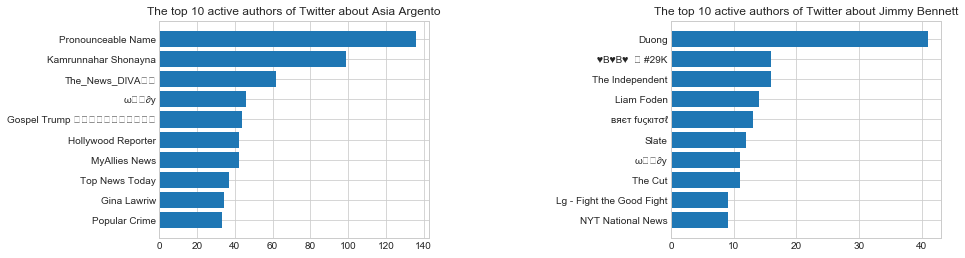

In [438]:
# они сочинили больше всех твитов
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
axes[0].barh(Asia_authors[9::-1]['author_name'], Asia_authors[9::-1]['count'])
axes[0].set_title('The top 10 active authors of Twitter about Asia Argento')
axes[1].barh(Jimmy_authors[9::-1]['author_name'], Jimmy_authors[9::-1]['count'])
axes[1].set_title('The top 10 active authors of Twitter about Jimmy Bennett')
plt.subplots_adjust(wspace=0.9)
plt.show()

# 4.2 Эти пользователи репостили твиты чаще всех остальных 

In [439]:
active_retweet_Asia = Asia.groupby(['author_name','is_RT'])['id_str'].agg('count').reset_index(name='count')#.sort_values('count',ascending = False)
active_retweet_Asia = active_retweet_Asia[['author_name','count']][active_retweet_Asia.is_RT == True].sort_values('count',ascending = False)
active_retweet_Asia.head()

,author_name,count
4608,Antonio Santos,191
22768,Instapundit.com,118
25438,Jim,113
2712,Alex Walker,96
35105,Meli ❤️💕🤣,93


In [440]:
active_retweet_Jimmy = Jimmy.groupby(['author_name','is_RT'])['id_str'].agg('count').reset_index(name='count')#.sort_values('count',ascending = False)
active_retweet_Jimmy = active_retweet_Jimmy[['author_name','count']][active_retweet_Jimmy.is_RT == True].sort_values('count',ascending = False)
active_retweet_Jimmy.head()

,author_name,count
12009,Michael,43
8634,Jim,37
1532,Antonio Santos,32
7667,Instapundit.com,27
888,Alex Walker,24


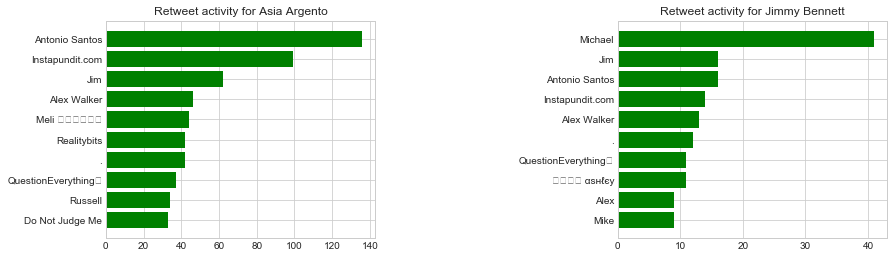

In [441]:
# они сделали ретвитов больше всех 
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
axes[0].barh(active_retweet_Asia[9::-1]['author_name'], Asia_authors[9::-1]['count'], color='green')
axes[0].set_title('Retweet activity for Asia Argento')
axes[1].barh(active_retweet_Jimmy[9::-1]['author_name'], Jimmy_authors[9::-1]['count'],color='green')
axes[1].set_title('Retweet activity for Jimmy Bennett')
plt.subplots_adjust(wspace=0.9)
plt.show()

# 5. Соотношение твитов и ретвитов

In [442]:
relationA = Asia.groupby('is_RT')['id_str'].agg('count')
relationA.head()

is_RT
False    32636
True     92970
Name: id_str, dtype: int64

In [443]:
relationJ = Jimmy.groupby('is_RT')['id_str'].agg('count')
relationJ.head()

is_RT
False     6627
True     24712
Name: id_str, dtype: int64

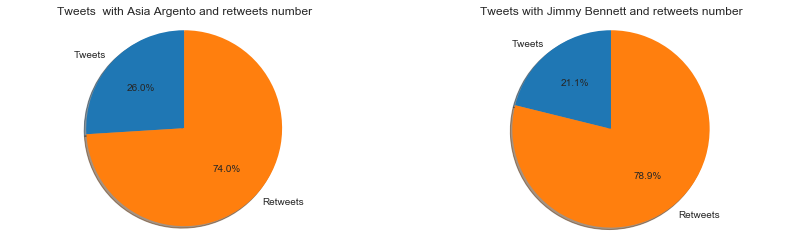

In [444]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
axes[0].pie(relationA, labels=['Tweets','Retweets'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].axis('equal') 
axes[0].set_title('Tweets  with Asia Argento and retweets number')
axes[1].pie(relationJ, labels=['Tweets','Retweets'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].axis('equal') 
axes[1].set_title('Tweets with Jimmy Bennett and retweets number')
plt.subplots_adjust(wspace=0.2)
plt.show()

# 6. Языки твитов

In [445]:
languages1 = Asia.groupby('lang')['id_str'].agg('count')
languages1
# только английский, так что в графике особого смысла нет

lang
en    125606
Name: id_str, dtype: int64

In [446]:
languages2 = Jimmy.groupby('lang')['id_str'].agg('count')
languages2

lang
en    31339
Name: id_str, dtype: int64

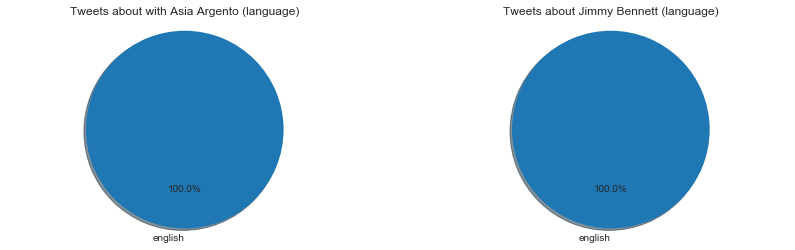

In [447]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
axes[0].pie(languages1, labels=['english'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].axis('equal') 
axes[0].set_title('Tweets about with Asia Argento (language)')
axes[1].pie(languages2, labels=['english'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].axis('equal') 
axes[1].set_title('Tweets about Jimmy Bennett (language)')
plt.subplots_adjust(wspace=0.2)
plt.show()

# 7. Процент подтвержденных пользователей

In [448]:
verif_Asia = Asia.groupby('is_verified_user')['author_id'].agg('count')
verif_Asia

is_verified_user
False    121613
True       3993
Name: author_id, dtype: int64

In [449]:
verif_Jimmy = Jimmy.groupby('is_verified_user')['author_id'].agg('count')
verif_Jimmy

is_verified_user
False    30221
True      1118
Name: author_id, dtype: int64

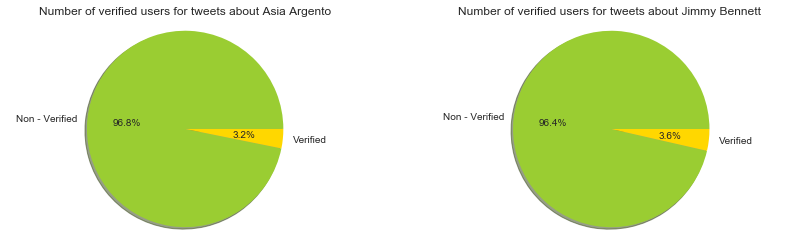

In [450]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
axes[0].pie(verif_Asia, labels=['Non - Verified','Verified'], colors =['yellowgreen', 'gold'], autopct='%1.1f%%',
        shadow=True, startangle=0)
axes[0].axis('equal') 
axes[0].set_title('Number of verified users for tweets about Asia Argento')
            
axes[1].pie(verif_Jimmy, labels=['Non - Verified','Verified'], colors =['yellowgreen', 'gold'], autopct='%1.1f%%',
        shadow=True, startangle=0)
axes[1].axis('equal') 
axes[1].set_title('Number of verified users for tweets about Jimmy Bennett ')
plt.subplots_adjust(wspace=0.2)
plt.show()

# 8. Количество твитов в день

In [451]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

In [452]:
A = Asia.groupby('created_at')['id_str'].agg('count').reset_index(name='count')
A.index = A.created_at
A= A.drop('created_at', axis = 1)
A.head()

,count
created_at,
2018-08-18 00:21:39,1
2018-08-18 01:03:46,1
2018-08-18 01:14:36,1
2018-08-18 01:35:11,1
2018-08-18 01:58:11,1


In [453]:
J = Jimmy.groupby('created_at')['id_str'].agg('count').reset_index(name='count')
J.index = J.created_at
J= J.drop('created_at', axis = 1)
J.head()

,count
created_at,
2018-08-18 01:47:10,1
2018-08-18 05:01:38,1
2018-08-18 12:16:49,1
2018-08-18 12:17:19,1
2018-08-18 12:19:05,1


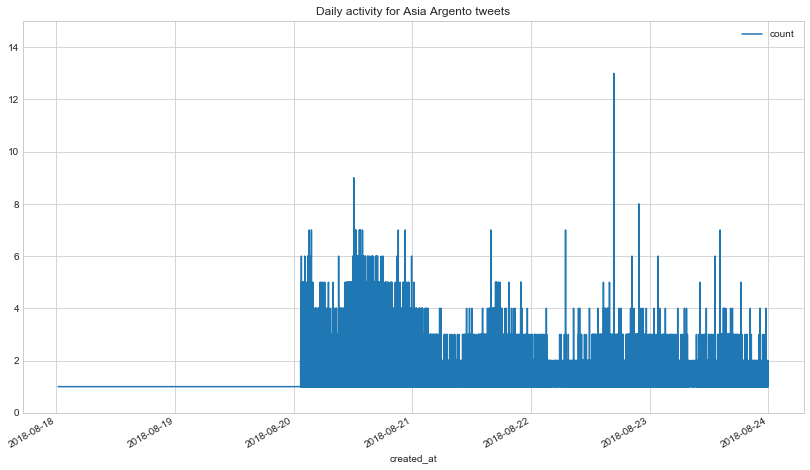

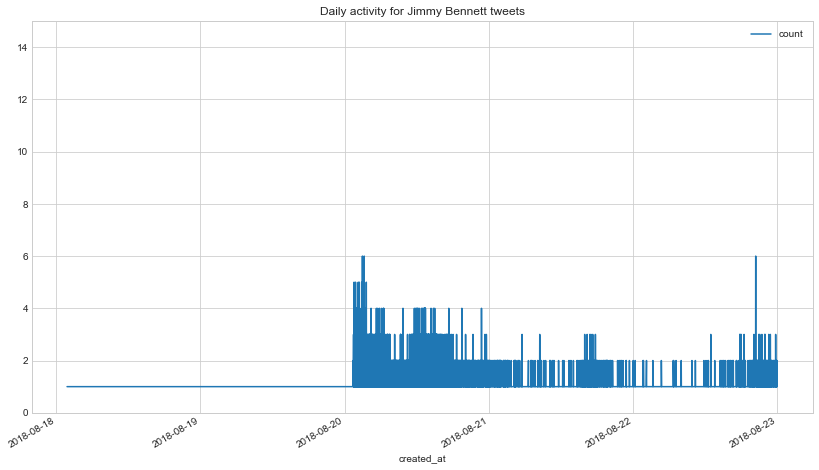

In [454]:
# это с использованием даты+время
A.plot(ylim = (0,15), figsize = (14,8), title = 'Daily activity for Asia Argento tweets')
# Про Jimmy поменьше пишут
J.plot(ylim = (0,15), figsize = (14,8), title = 'Daily activity for Jimmy Bennett tweets')

In [455]:
# Добавляем столбец, содержащий только дату
Asia['date'] = Asia['created_at'].dt.date
Jimmy['date'] = Jimmy['created_at'].dt.date
# Группируем данные по этому столбцу
dayA = Asia.groupby(['date']).id_str.count().reset_index(name='Asia_count')
dayJ = Jimmy.groupby(['date']).id_str.count().reset_index(name='Jimmy_count')
# Строим график

#dayA.plot(title = 'Tweets number in the day')


In [456]:
days = dayA.join(dayJ, on = dayA.index, how = 'right', rsuffix = '_Jimmy')
days = days.drop('key_0', axis = 1)
days = days.drop('date_Jimmy', axis = 1)
days.index = days.date
days = days.drop('date', axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB1B670EF0>,
      dtype=object)

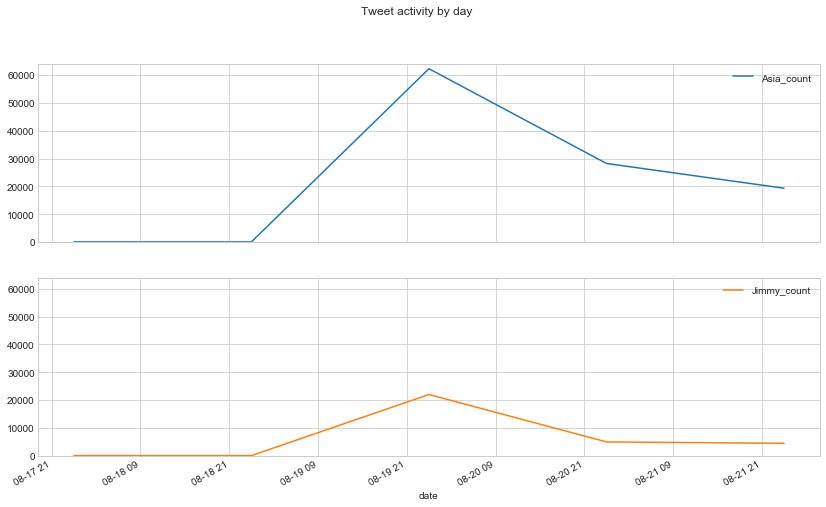

In [457]:
days.plot(subplots = True, sharex = True,stacked = True, ylim = (0, 64000), title = 'Tweet activity by day', figsize = (14,8))

Видно, что данная тема продержалась около 5-6 дней,а затем интерес к ней снизился

# 9. Корреляция между данными таблиц


In [458]:
# посмотрим, есть ли корреляция между данными о том, подтвержден ли пользователь и количеством твитов от него

In [459]:
corrA = Asia.groupby(['author_id', 'is_verified_user'])['id_str'].agg('count').reset_index(name = 'count_of_tweets')
corrA.head()

,author_id,is_verified_user,count_of_tweets
0,762,False,1
1,2577,False,1
2,3839,True,1
3,4013,False,2
4,10580,False,1


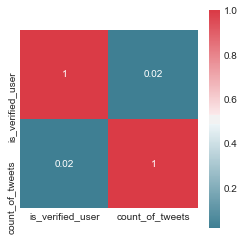

In [460]:
columns_show = ['is_verified_user','count_of_tweets']
f, ax = plt.subplots(figsize=(4,4))
corr = corrA[columns_show].corr()
sns.heatmap(corr, mask = np.zeros_like(corr,dtype = np.bool), cmap = sns.diverging_palette(220,10, as_cmap=True),
           square = True, ax=ax, annot = True)
#  либо не там ищу, либо корреляции нет, но график приятный)

# 10. Облако слов 

In [461]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [462]:
def wc(data,bgcolor):
    plt.figure(figsize = (80,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    

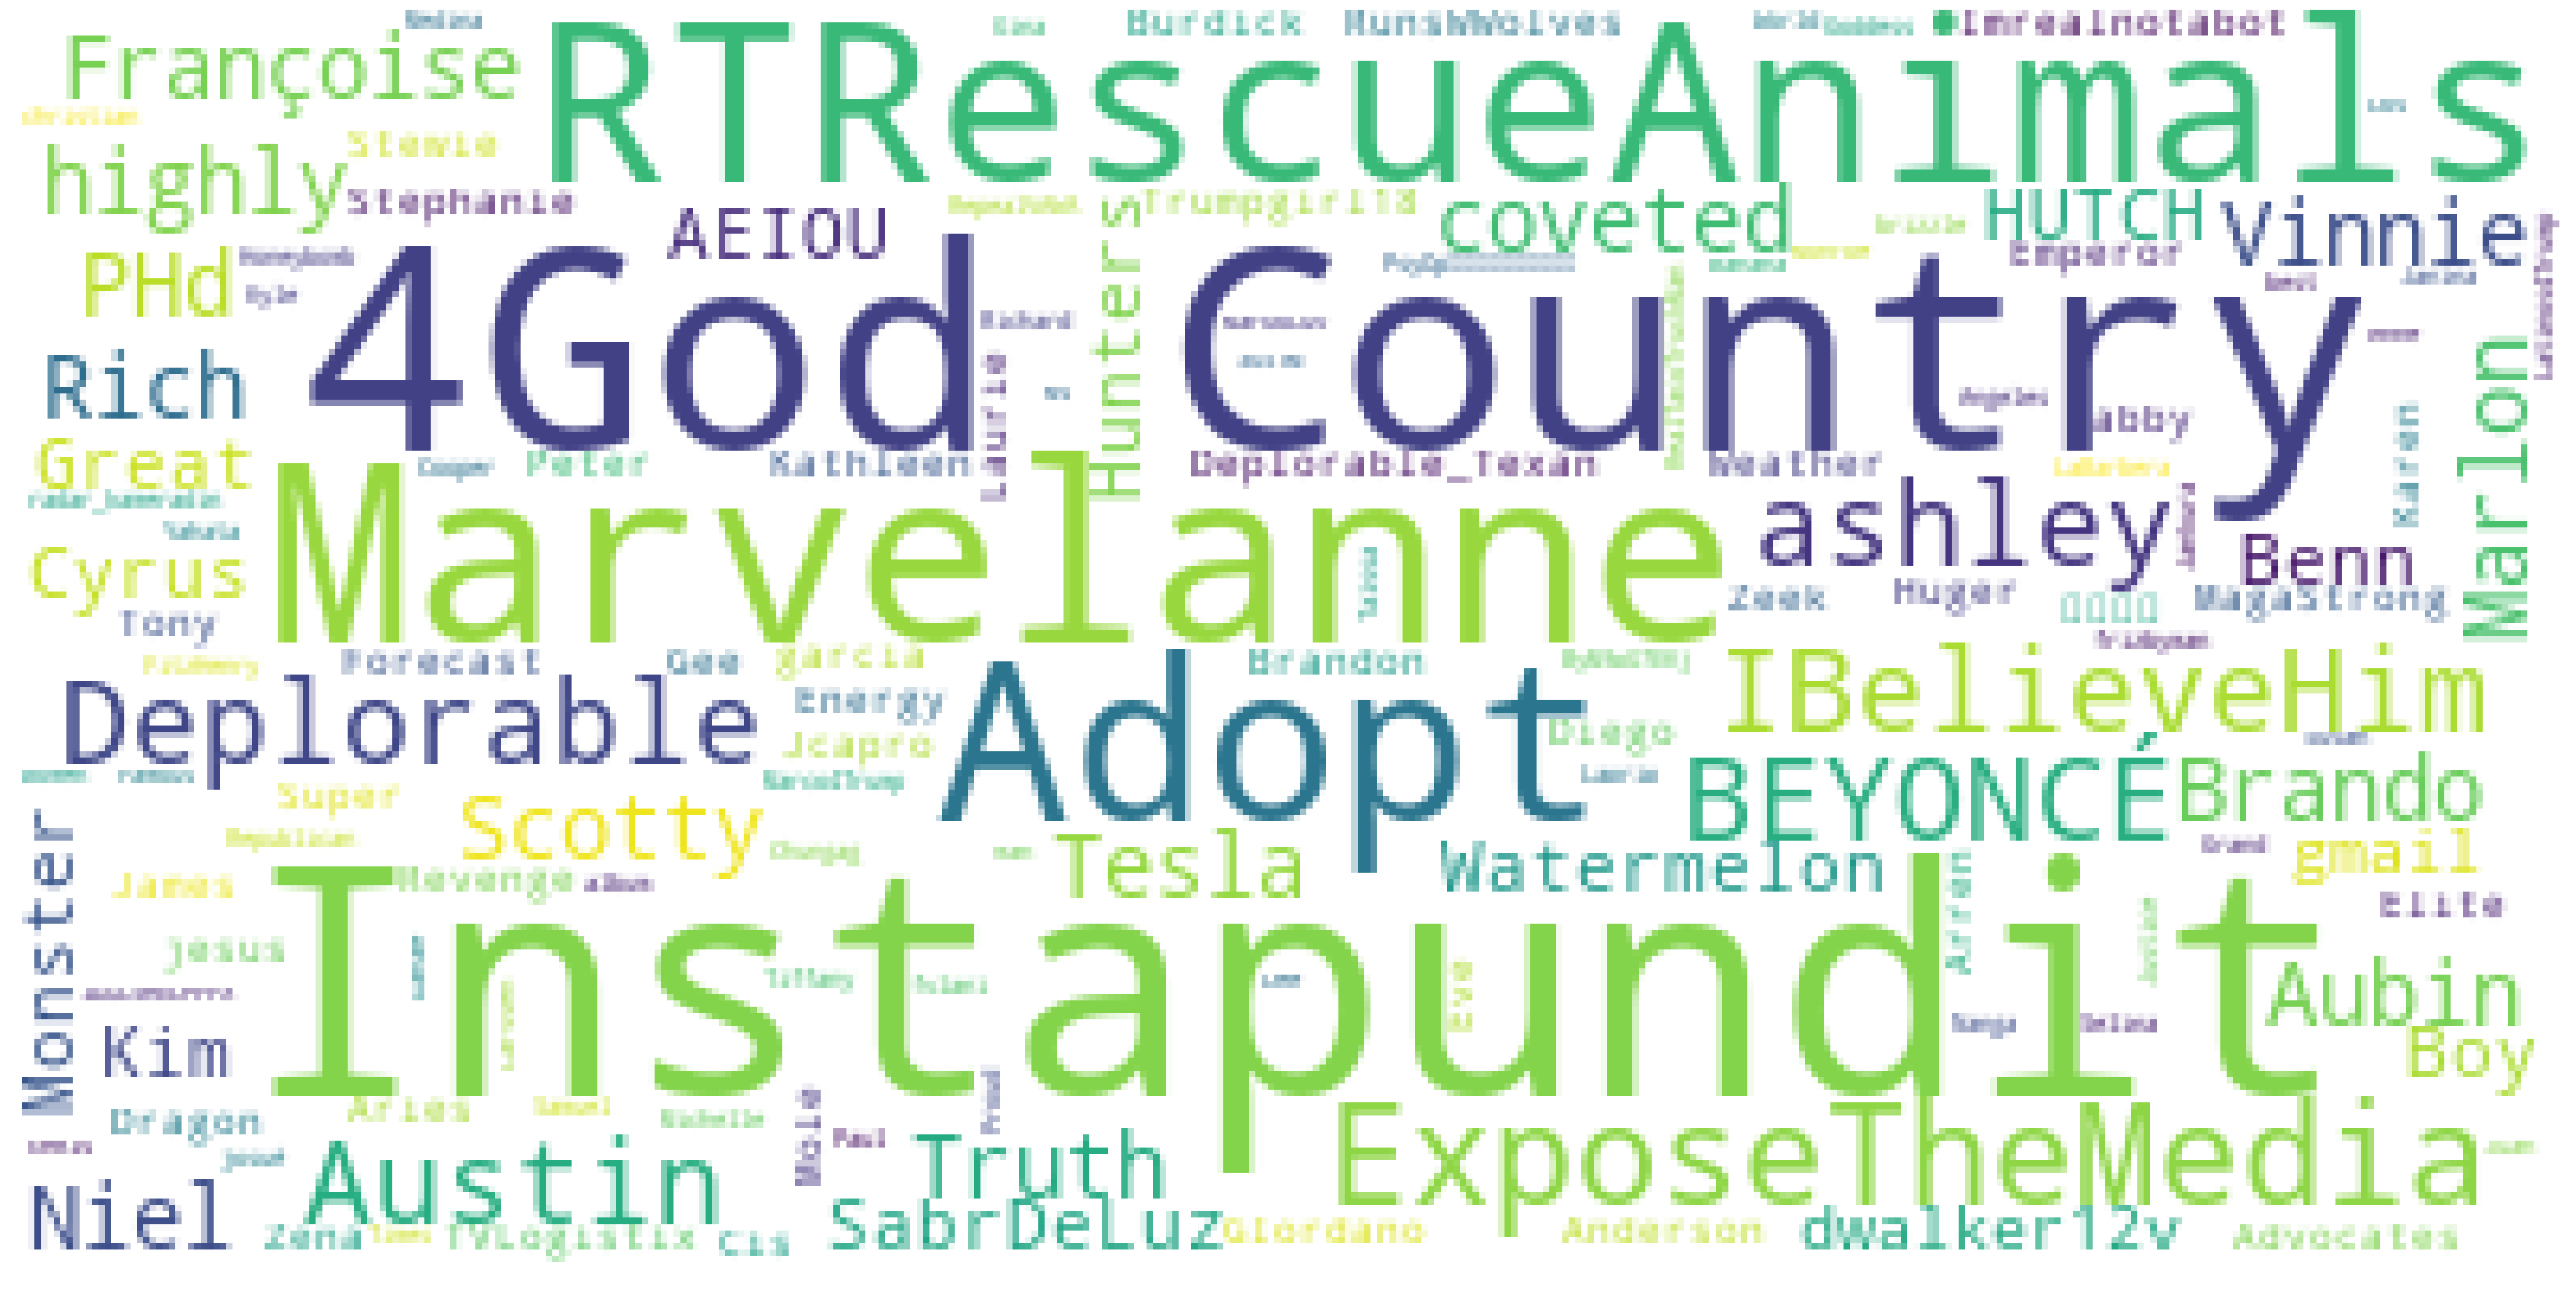

In [463]:
# Облако слов из авторов
wc(Asia.author_name[:100],'white' )

# 11. Часто встречающиеся слова в текстах твитов

In [464]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

In [465]:
top_N = 100

text_lower = Asia['text'].str.lower().str.cat(sep=' ')

text_lower_Jimmy = Jimmy['text'].str.lower().str.cat(sep=' ')

# Удалить пунктуацию, вернуть список слов
text_remove_pun = re.sub('[^A-Za-z]+', ' ', text_lower)
text_remove_pun_Jimmy = re.sub('[^A-Za-z]+', ' ', text_lower_Jimmy)



# удалить стоп-слова 
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [466]:
word_tokens_text = word_tokenize(text_remove_pun)
word_tokens_text_Jimmy = word_tokenize(text_remove_pun_Jimmy)
#filtered_sentence_text = [w_in_text for w_in_text in word_tokens_text if not w_in_text in stop_words]
filtered_sentence_text_A = []
filtered_sentence_text_J = []
for w_in_text in word_tokens_text:
    if w_in_text not in stop_words:
        filtered_sentence_text_A.append(w_in_text)
        
filtered_sentence_text_J = []
for w_in_text in word_tokens_text_Jimmy:
    if w_in_text not in stop_words:
        filtered_sentence_text_J.append(w_in_text)

# удалить слова короче, чем 2 символа  
without_single_chr_text_A = [w_in_text for w_in_text in filtered_sentence_text_A if len(w_in_text) > 2]
without_single_chr_text_J = [w_in_text for w_in_text in filtered_sentence_text_J if len(w_in_text) > 2]

# удалить числа
cleaned_data_text_A = [w_in_text for w_in_text in without_single_chr_text_A if not w_in_text.isnumeric()]
cleaned_data_text_J = [w_in_text for w_in_text in without_single_chr_text_J if not w_in_text.isnumeric()] 

# вычислить частоту распределения слов
word_dist_text_A = nltk.FreqDist(cleaned_data_text_A)
rslt_text_A = pd.DataFrame(word_dist_text_A.most_common(top_N),
                    columns=['Word', 'Frequency'])


word_dist_text_J = nltk.FreqDist(cleaned_data_text_J)
rslt_text_J = pd.DataFrame(word_dist_text_J.most_common(top_N),
                    columns=['Word', 'Frequency'])

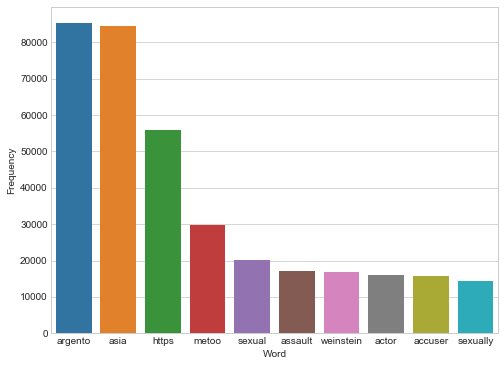

In [467]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_text_A.head(10))

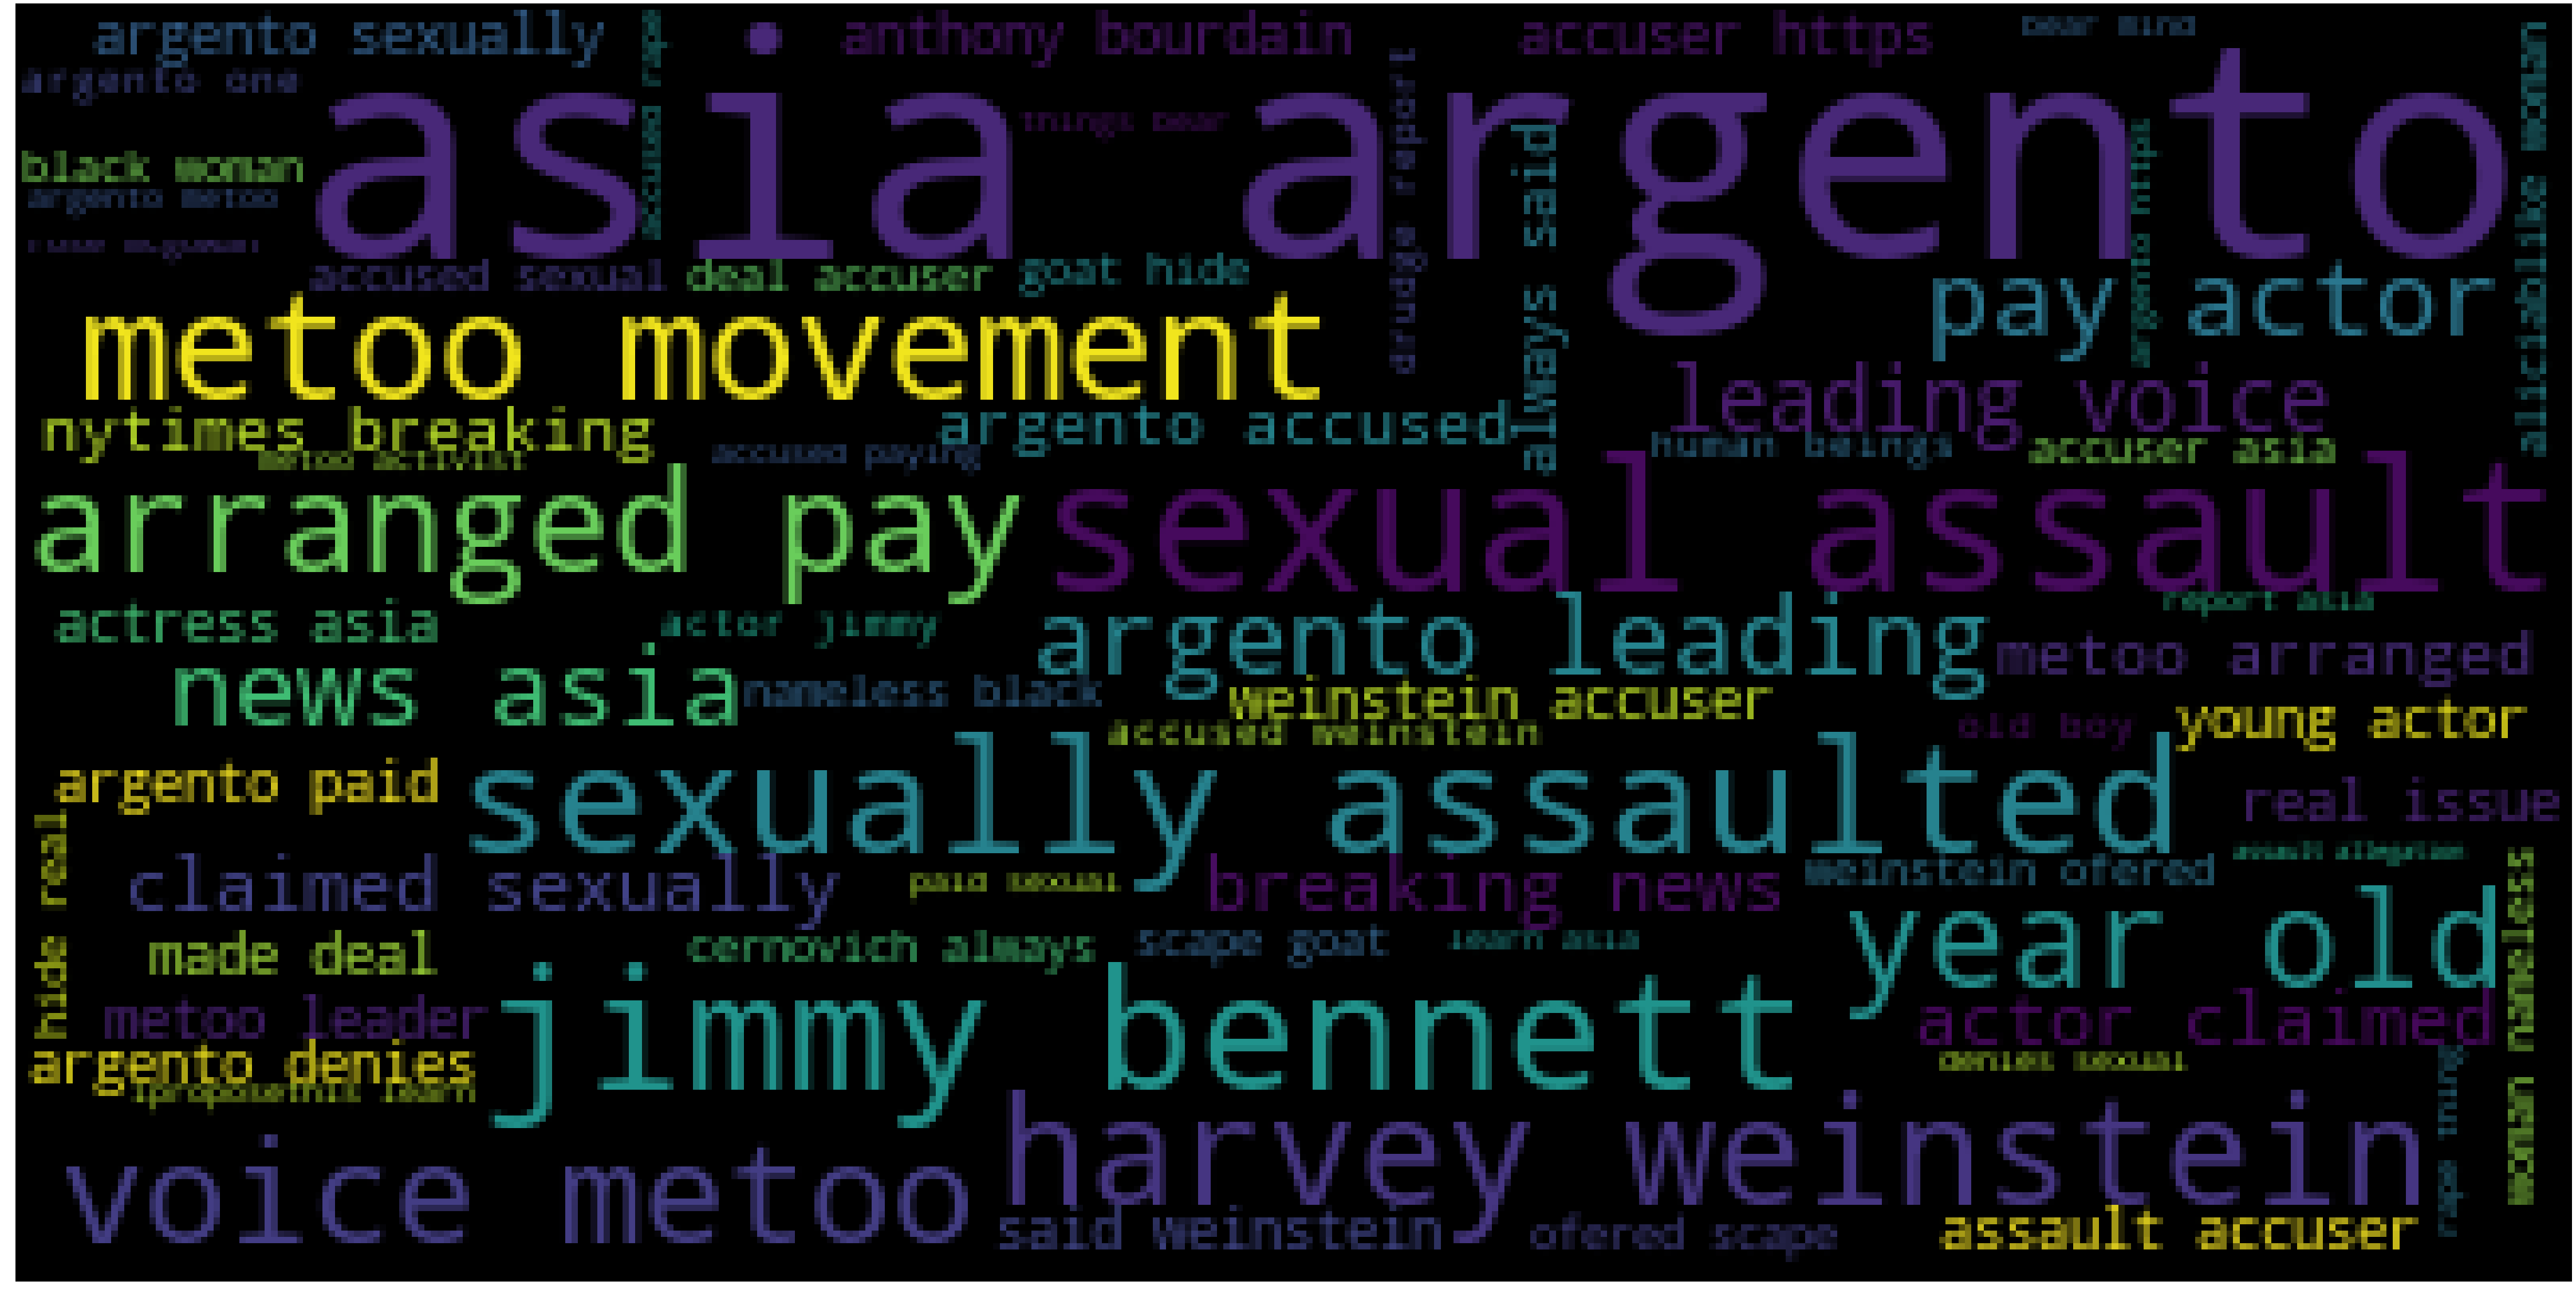

In [468]:
wc(cleaned_data_text_A,'black')

Среди часто встречающихся слов есть harvey veinstein, видимо, был тоже инцидент на тему sexual assault

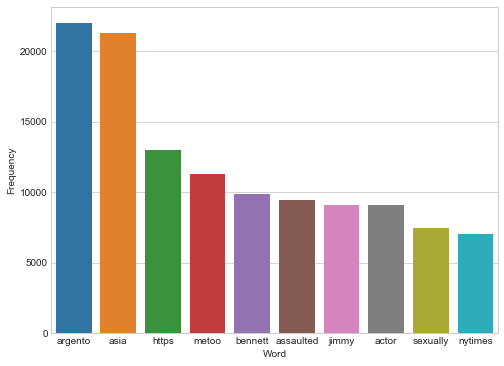

In [469]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_text_J.head(10))

Из двух персонажей Asia Argento кажется более популярной по частоте упоминаний. 

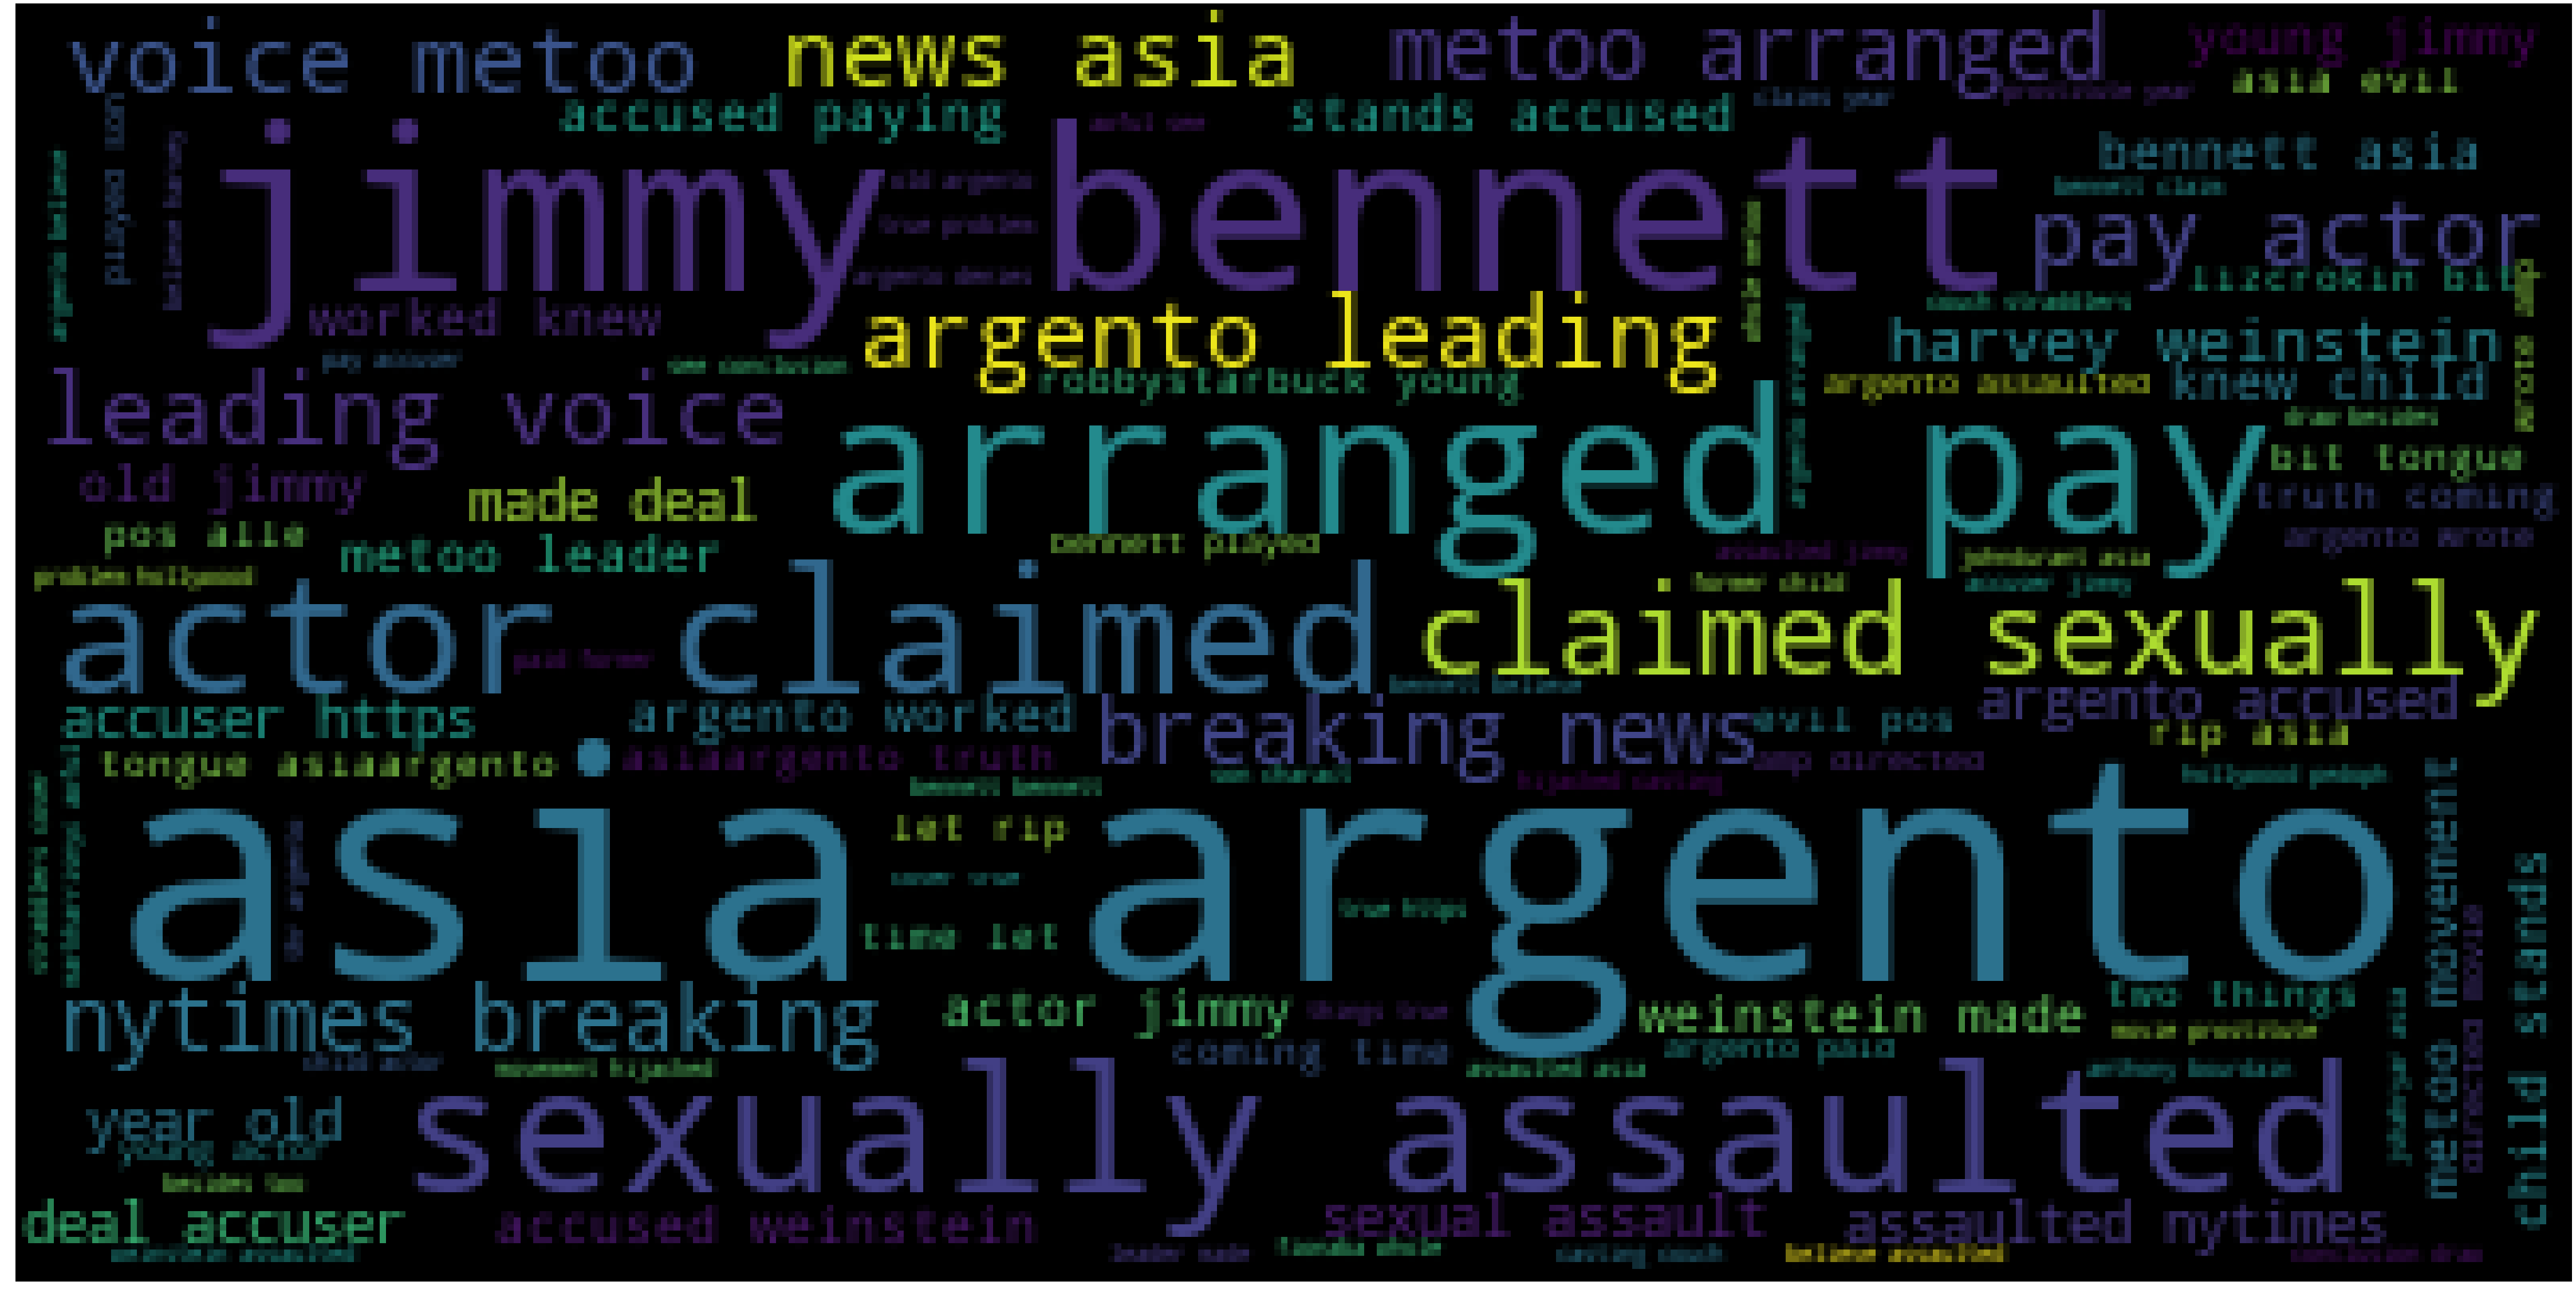

In [470]:
wc(cleaned_data_text_J,'black')

# 12.  Анализ эмоциональной окраски твитов при помощи пакета textblob

In [471]:
from textblob import TextBlob

In [472]:
bloblist_text_A = list()
bloblist_text_J = list()

In [473]:
# Берем первые 1000 твитов для примера, так как только половина таблицы Asia Argento обрабатывается около часа((
text_str_Asia=Asia['text'][:1000].astype(str) 
#text_str.head()
text_str_Jimmy = Jimmy['text'][:1000].astype(str) 

In [474]:
for row in text_str_Asia:
    blob = TextBlob(row)
    bloblist_text_A.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    #print(row[1])
    tweet_polarity_Asia = pd.DataFrame(bloblist_text_A, columns = ['sentence','sentiment','polarity'])
    
for row in text_str_Jimmy:
    blob = TextBlob(row)
    bloblist_text_J.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    #print(row[1])
    tweet_polarity_Jimmy = pd.DataFrame(bloblist_text_J, columns = ['sentence','sentiment','polarity'])

In [475]:
def f(tweet_polarity):
    if tweet_polarity['sentiment'] > 0:
        val = "Positive"
    elif  tweet_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

tweet_polarity_Asia['Sentiment_Type'] =  tweet_polarity_Asia.apply(f, axis=1)
tweet_polarity_Jimmy['Sentiment_Type'] =  tweet_polarity_Jimmy.apply(f, axis=1)

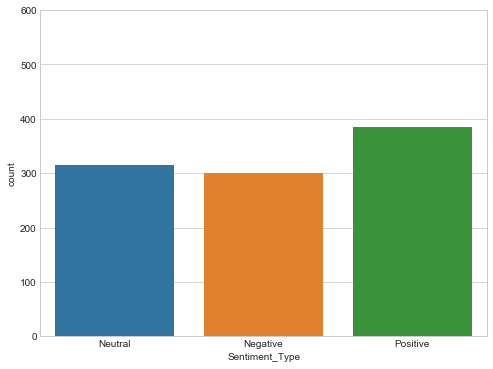

In [476]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylim(0, 600)

ax = sns.countplot(x="Sentiment_Type", data = tweet_polarity_Asia)

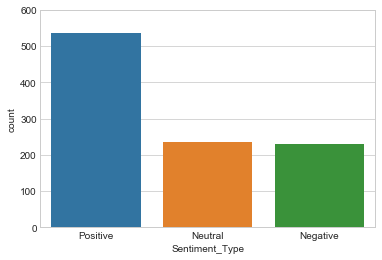

In [477]:
# plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylim(0, 600)

ax = sns.countplot(x="Sentiment_Type", data = tweet_polarity_Jimmy)

Из 1000 твитов про Asia Argento  мы видим около 400 positive, около 300 negative  и чуть менее 300 neutral отзывов.
В то же время про Jimmy Bennett : около 540 positive,  менее 250 negative  и  менее 250 neutral отзывов. 
Можно предположить, что Asia Argento вызвала порицание общественности в большей степени, чем Jimmy Bennett.

# 13. Немножко данных из Google Trends

In [478]:
Asia5 = pd.read_csv('Asia5.csv')
Asia5.head()

,Категория: Все категории
Неделя,asia argento: (По всему миру)
2013-12-08,1
2013-12-15,1
2013-12-22,1
2013-12-29,1


In [480]:
# модель строки
pattern = r'(\d{4}-\d{2}-\d{2}),([^,]+|\".*\")\n'
with open('Asia5.csv', encoding='utf-8') as f:
# запишем новую таблицу
    with open('Asia5-normalized.csv', 'w+', encoding='utf-8') as w:
        w.write('Неделя,asia argento: (По всему миру)\n')
        for match in re.finditer(pattern, f.read()):
            
            w.write(match.group(1) + ',' +
                    match.group(2).replace('<', '') + '\n') #.replace('>', '') 
                    

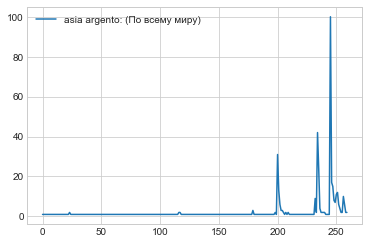

In [481]:
Asia5 = pd.read_csv('Asia5-normalized.csv')
Asia5.plot() #  Наблюдается три выраженных пика, когда количество запросто было максимальным

In [482]:
Asia5 = Asia5.rename(index=str, columns={"Неделя": "week", "asia argento: (По всему миру)": "num"})
Asia5.sort_values('num', ascending = False)[:5]

,week,num
245,2018-08-19,100
234,2018-06-03,42
200,2017-10-08,31
235,2018-06-10,24
246,2018-08-26,17


Максимальное число запросов в процентном соотношении соответствует как раз неделе с 19 авг 2018, когда и произошли события, обсуждаемые в Twitter Далее у Asia Argento что-то спровоцировало рост числа запросов в неделю с 3 июня 2018 и 10 окт 2017. Википедия говорит, что в эти даты: в октябре 2017 Harvey Weinstein был обвинен в домогательствах к актрисам, в числе которых было Asia Argento и 8 июня 2018 Anthony Bourdain, с которым Asia Argento была в отношениях, был найден мертвым.

In [483]:
# то же самое про Jimmy Bennett
pattern = r'(\d{4}-\d{2}-\d{2}),([^,]+|\".*\")\n'
with open('Jimmy5.csv', encoding='utf-8') as f:
# запишем новую таблицу
    with open('Jimmy5-normalized.csv', 'w+', encoding='utf-8') as w:
        w.write('Неделя,jimmy bennett: (По всему миру)\n')
        for match in re.finditer(pattern, f.read()):
            
            w.write(match.group(1) + ',' +
                    match.group(2).replace('<', '') + '\n')
Jimmy5 = pd.read_csv('Jimmy5-normalized.csv')
Jimmy5 = Jimmy5.rename(index=str, columns={"Неделя": "week", "jimmy bennett: (По всему миру)": "num"})
Jimmy5.sort_values('num', ascending = False)[:5]

,week,num
245,2018-08-19,100
246,2018-08-26,8
251,2018-09-30,8
247,2018-09-02,7
250,2018-09-23,6


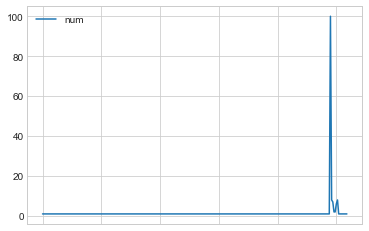

In [484]:
Jimmy5.plot() # а у Jimmy ничего особо интересного и не происходило до августа 2018, 
#о чем говорит график и первая строка сортированного списка

Вывод: Различные события в жизни известных людей достаточно сильно отражаются на статистике упоминаний в соцсетях 
и поисковых запросах. Можно предположить, Jimmy Bennett на фоне многочисленных заявлений о насилии среди других звезд, решил 
именно в данный период обратить на себя внимание, что ему прекрасно удалось, судя по графику) Популярность Asia Argento все же
повыше в целом (например, пункт 8, ее чаще упоминают), но два из трех пиковых значений количества запросов связаны с упоминанием о насилии и значительно выделяются.
Указанные периоды популярности не длятся долго, что можно увидеть и на графиках, полученных с помощью Google trends, и в пункте 8 - примерно через 5-6 дней количество упоминаний снижается практически до уровня, который был до скандала.



Спасибо за внимание!
